# Central Limit Theory

![title](clm.png)

Engineering a population with a non-normal distribution into a normal distribution

In [72]:
# Loading in the tips dataset
import seaborn as sns
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


If we look at the distribution of our `total_bill` column we see it is not a normal distribution.  Showing some right skew

mean:  19.78594262295082
median:  17.795
std:  8.902411954856856
skew:  1.1332130376158205


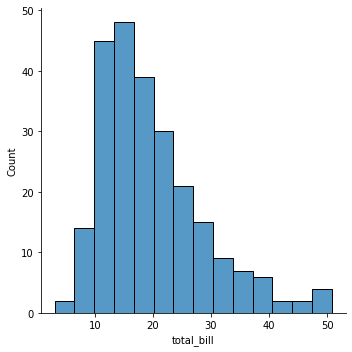

In [60]:
sns.displot(df['total_bill']);
print('mean: ', df.total_bill.mean())
print('median: ', df.total_bill.median())
print('std: ', df.total_bill.std())
print('skew: ', df.total_bill.skew())

In [64]:
# We can take a sample from the population and find a sample mean
print('Sample mean: ', df.total_bill.sample(10, replace=True).mean())

display(df.total_bill.sample(10, replace=True))

Sample mean:  23.654


174    16.82
134    18.26
82     10.07
230    24.01
105    15.36
204    20.53
174    16.82
175    32.90
35     24.06
237    32.83
Name: total_bill, dtype: float64

We can repeat this process over and over, and then look at the distribution of our sample means to achieve a normal distribution

mu:  20.085592000000002
median:  19.722
sigma:  4.019871814417058
skew:  0.49016992968626394


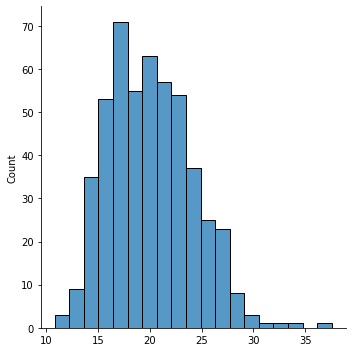

In [67]:
import pandas as pd
# Here, 500 examples of 5 samples

means = []
for i in range(500):
    means.append(df.total_bill.sample(5, replace=True).mean())

means = pd.Series(means)

sns.displot(means)
print('mu: ', means.mean())
print('median: ', means.median())
print('sigma: ', means.std())
print('skew: ', means.skew())

And the larger our sample size, the more narrow our distribution becomes (smaller our standard deviation)

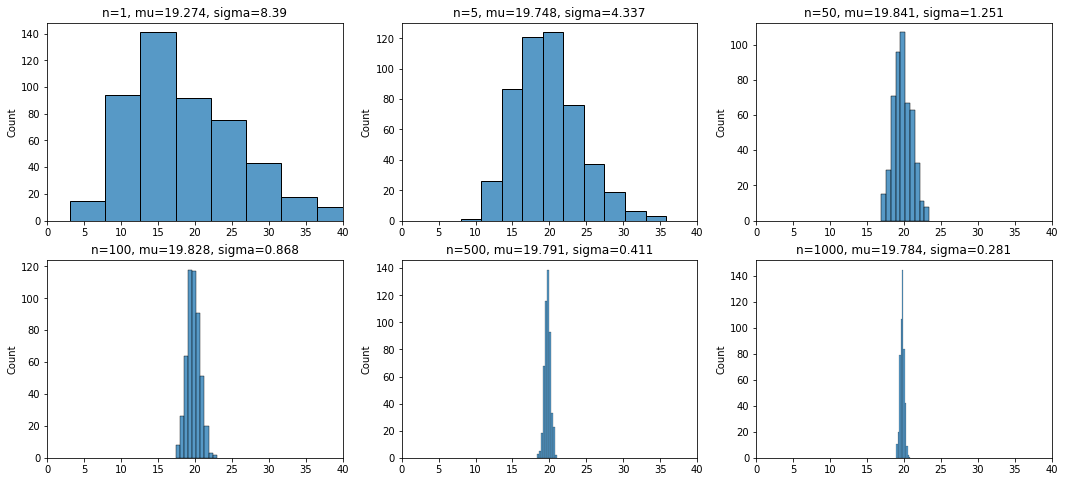

In [71]:
import matplotlib.pyplot as plt

n_s = [1,5,50,100,500,1000]
fig, axes = plt.subplots(2,3, figsize=(18,8))

for n, ax in zip(n_s, axes.flat):
    means= [(df.total_bill.sample(n, replace=True).mean()) for i in range(500)]
    ax.set_xlim(0,40)
    ax.set_title(f"n={n}, mu={round(np.mean(means),3)}, sigma={round(np.std(means),3)}")
    sns.histplot(means, bins=10, ax=ax)



# Hypothesis Testing

Test new feature:

- Users spend on average: 300 seconds per session (mu)
- standard deviation of 50 seconds (sigma)

Changing background color **will** increase the time users spend on the site per session.  Sample 100 users:

*Hypothesis 0* - dark mode changes nothing

*Hypothesis 1* - I was right, they will stay longer

*significance level* **0.05** - p-value must fall below 5% to be considered significant.

Said another way, the mean for our test sample must fall outside of the 95% confidence interval for the population mean, otherwise we consider it random chance

Sample size of 100 is large enough that CLT kicks in. sample mean follows a normal distribution of the population mean, and population standard deviation divided by n:  

*N* (300, 50 / $\sqrt{100}$) => *N* (300, 50/10) => *N* (300,5)

![title](hypothesis.png)


👆 Our sample mean is exactly 2 standard deviations away from the mean, why isn't the area underneath 0.025?!? 👆

In [94]:
from scipy.stats import norm

# lets create the distribution
X = norm(300, 5)
# If we look at our confidance interval
# it's not a clean 290 - 310 (1.96 std)
# We say 95% confidance interval ~= 2 std
X.interval(0.95)

(290.2001800772997, 309.7998199227003)

# Bayes Theory

![title](bayes.png)
